In [21]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import shapiro

# Loading the libraries

In [2]:
# Loading the data
data = pd.read_excel('dataset_lfs_2024.xlsx')

In [3]:
data.dropna(subset=["HRLYEARN"],inplace=True)
# Removing the null values in HRLYEARN column

In [4]:
data['HRLYEARN']=data['HRLYEARN']/100
# The data dictionary for this dataset indicated that the last 2 values of this numeric column were the decimal points. So dividing the HRLYEARN column by 100 will add 2 decimal points. 

In [6]:
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_file("EDA after eliminating blanks of Usual Hourly Wages (HRLYEARN).html")
# Generating the profiling report after removing the null values in HRLYEARN column

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
full_variable_name_mapping={
'rec_num':'Order of record in file',
'survyear':'Survey year',
'survmnth':'Survey month',
'lfsstat':'Labour force status',
'prov':'Province',
'cma':'Nine largest CMAs',
'age_12':'Five-year age group of respondent',
'age_6':'Age in 2 and 3 year groups, 15 to 29',
'sex':'Sex of respondent',
'marstat':'Marital status of respondent',
'educ':'Highest educational attainment',
'mjh':'Single or multiple jobholder',
'everwork':'Identifies if a person has worked in the last year',
'ftptlast':'Full- or part-time status of last job',
'cowmain':'Class of worker, main job',
'immig':'Immigrant status',
'naics_21':'Industry of main job',
'noc_10':'Occupation at main job (noc_10)',
'noc_43':'Occupation at main job (noc_43)',
'yabsent':'Reason of absence, full week',
'wksaway':'Number of weeks absent from work',
'payaway':'Paid for time off, full-week absence only',
'uhrsmain':'Usual hours worked per week at main job',
'ahrsmain':'Actual hours worked per week at main job',
'ftptmain':'Full- or part-time status at main or only job',
'utothrs':'Usual hours worked per week at all jobs',
'atothrs':'Actual hours worked per week at all jobs',
'hrsaway':'Hours away from work, part-week absence only',
'yaway':'Reason for part-week absence',
'paidot':'Paid overtime hours in reference week',
'unpaidot':'Unpaid overtime hours in reference week',
'xtrahrs':'Number of overtime or extra hours worked',
'whypt':'Reason for part-time work',
'tenure':'Job tenure with current employer',
'prevten':'Job tenure with previous employer',
'hrlyearn':'Usual hourly wages',
'union':'Union status',
'permtemp':'Job permanency',
'estsize':'Establishment size',
'firmsize':'Firm size',
'durunemp':'Duration of unemployment',
'flowunem':'Flows into unemployment',
'unemftpt':'Job seekers by type of work sought and temporary layoffs by work status of last job',
'whylefto':'Reason for leaving job during previous year (whylefto)',
'whyleftn':'Reason for leaving job during previous year (whyleftn)',
'durjless':'Duration of joblessness',
'availabl':'Availability during the reference week',
'lkpubag':'Unemployed, used public employment agency',
'lkemploy':'Unemployed, checked with employers directly',
'lkrels':'Unemployed, checked with friends or relatives',
'lkatads':'Unemployed, looked at job ads',
'lkansads':'Unemployed, placed or answered ads',
'lkothern':'Unemployed, other methods',
'prioract':'Main activity before started looking for work',
'ynolook':'Reason for not looking for work during the reference week',
'tlolook':'Temporary layoff, looked for work during the last four weeks',
'schooln':'Current student status',
'efamtype':'Type of economic family',
'agyownk':'Age of youngest child',
'finalwt':'Standard final weight'}

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Displaying all the columns and rows

data.describe()
# Displaying the summary statistics of the data

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
count,223792.000000,223792.0,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,50224.000000,223792.000000,223792.000000,223792.000000,223792.000000,0.0,0.0,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,17528.000000,17528.000000,17528.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,206264.000000,27444.000000,206264.000000,206264.000000,206264.000000,39146.000000,223792.000000,0.0,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213334.000000,223792.000000,83597.000000,223792.000000
mean,55321.900046,2024.0,2.513834,1.078323,34.557862,1.780296,5.971103,4.112874,1.504031,2.904925,3.836290,1.054090,NaN,NaN,1.718672,2.689555,13.386167,5.110942,22.443416,1.757930,15.117013,1.555739,352.961272,324.483735,1.174921,360.219105,331.016775,14.310398,1.713088,7.720979,6.536584,14.257563,4.077811,89.695391,NaN,34.336227,2.359682,1.230393,2.220821,3.011176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117211,5.058760,2.192435,313.946902
std,31946.928056,0.0,1.118087,0.268679,14.472853,2.801541,2.800990,1.567248,0.499985,2.212543,1.453516,0.226197,NaN,NaN,0.449648,0.614722,4.917282,2.615527,12.566916,1.036502,22.949399,0.496898,106.805351,151.450875,0.379901,111.874585,155.582555,46.677460,1.066510,34.819115,28.905280,44.704272,1.740276,82.755065,NaN,18.498759,0.922253,0.704776,1.047460,1.157277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383993,5.099748,1.073851,288.183784
min,1.000000,2024.0,1.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,5.770000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000
25%,27662.000000,2024.0,2.000000,1.000000,24.000000,0.000000,4.000000,3.000000,1.000000,1.000000,3.000000,1.000000,NaN,NaN,1.000000,3.000000,10.000000,3.000000,10.000000,1.000000,1.000000,1.000000,350.000000,250.000000,1.000000,350.000000,260.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,19.000000,NaN,21.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,136.000000
50%,55343.000000,2024.0,3.000000,1.000000,35.000000,0.000000,6.000000,4.000000,2.000000,2.000000,4.000000,1.000000,NaN,NaN,2.000000,3.000000,14.000000,5.000000,23.000000,2.000000,3.000000,2.000000,380.000000,375.000000,1.000000,400.000000,375.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,58.000000,NaN,29.330000,3.000000,1.000000,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,2.000000,220.000000
75%,82999.000000,2024.0,4.000000,1.000000,47.000000,4.000000,8.000000,6.000000,2.000000,6.000000,5.000000,1.000000,NaN,NaN,2.000000,3.000000,17.000000,7.000000,34.000000,3.000000,20.000000,2.000000,400.000000,400.000000,1.000000,400.000000,400.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,153.000000,NaN,43.000000,3.000000,1.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,3.000000,370.000000
max,112082.000000,2024.0,4.000000,2.000000,59.000000,9.000000,12.000000,6.000000,2.000000,6.000000,6

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223792 entries, 2 to 442573
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REC_NUM   223792 non-null  int64  
 1   SURVYEAR  223792 non-null  int64  
 2   SURVMNTH  223792 non-null  int64  
 3   LFSSTAT   223792 non-null  int64  
 4   PROV      223792 non-null  int64  
 5   CMA       223792 non-null  int64  
 6   AGE_12    223792 non-null  int64  
 7   AGE_6     50224 non-null   float64
 8   SEX       223792 non-null  int64  
 9   MARSTAT   223792 non-null  int64  
 10  EDUC      223792 non-null  int64  
 11  MJH       223792 non-null  float64
 12  EVERWORK  0 non-null       float64
 13  FTPTLAST  0 non-null       float64
 14  COWMAIN   223792 non-null  float64
 15  IMMIG     223792 non-null  int64  
 16  NAICS_21  223792 non-null  float64
 17  NOC_10    223792 non-null  float64
 18  NOC_43    223792 non-null  float64
 19  YABSENT   17528 non-null   float64
 20  WKSA

In [7]:
# Missing values
data_missing_values= data.isnull().sum()
pd.DataFrame(data_missing_values, columns=['Missing Values'])
#percentage of missing values
data_percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_values_percent=pd.DataFrame(data_percent_missing, columns=['Missing Values %'])
missing_values_percent=missing_values_percent.rename_axis('Variables')
missing_values_percent

,Missing Values %
Variables,
REC_NUM,0.00
SURVYEAR,0.00
SURVMNTH,0.00
LFSSTAT,0.00
PROV,0.00
CMA,0.00
AGE_12,0.00
AGE_6,77.56
SEX,0.00


In [136]:
data.head()

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
2,3,2024,1,1,10,0,1,2.0,1,6,2,1.0,NaN,NaN,2.0,3,10.0,7.0,33.0,NaN,NaN,NaN,250.0,220.0,2.0,250.0,220.0,0.0,NaN,0.0,0.0,0.0,6.0,41.0,NaN,15.00,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4,NaN,34
3,4,2024,1,1,35,4,12,NaN,1,2,4,1.0,NaN,NaN,2.0,3,8.0,10.0,42.0,NaN,NaN,NaN,400.0,400.0,1.0,400.0,400.0,0.0,NaN,0.0,0.0,0.0,NaN,178.0,NaN,24.50,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,275
4,5,2024,1,1,35,0,6,NaN,1,1,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,450.0,420.0,1.0,450.0,420.0,0.0,NaN,0.0,0.0,0.0,NaN,212.0,NaN,28.00,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2.0,231
6,7,2024,1,1,24,2,10,NaN,1,5,6,1.0,NaN,NaN,2.0,3,14.0,3.0,13.0,NaN,NaN,NaN,375.0,375.0,1.0,375.0,375.0,0.0,NaN,0.0,0.0,0.0,NaN,240.0,NaN,24.74,3.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,159
7,8,2024,1,1,59,0,3,6.0,1,2,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,400.0,840.0,1.0,400.0,840.0,0.0,NaN,440.0,0.0,440.0,NaN,17.0,NaN,40.00,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,131


In [8]:
data_type_mapping={
'rec_num':'Nominal',
'survyear':'Ordinal',
'survmnth':'Ordinal',
'lfsstat':'Nominal',
'prov':'Nominal',
'cma':'Nominal',
'age_12':'Ordinal',
'age_6':'Ordinal',
'sex':'Nominal',
'marstat':'Nominal',
'educ':'Ordinal',
'mjh':'Nominal',
'everwork':'Nominal',
'ftptlast':'Nominal',
'cowmain':'Nominal',
'immig':'Nominal',
'naics_21':'Nominal',
'noc_10':'Nominal',
'noc_43':'Nominal',
'yabsent':'Nominal',
'wksaway':'Nominal',
'payaway':'Nominal',
'uhrsmain':'Continuous',
'ahrsmain':'Continuous',
'ftptmain':'Nominal',
'utothrs':'Continuous',
'atothrs':'Continuous',
'hrsaway':'Continuous',
'yaway':'Nominal',
'paidot':'Continuous',
'unpaidot':'Continuous',
'xtrahrs':'Continuous',
'whypt':'Nominal',
'tenure':'Discrete',
'prevten':'Discrete',
'hrlyearn':'Continuous',
'union':'Nominal',
'permtemp':'Nominal',
'estsize':'Ordinal',
'firmsize':'Ordinal',
'durunemp':'Discrete',
'flowunem':'Nominal',
'unemftpt':'Nominal',
'whylefto':'Nominal',
'whyleftn':'Nominal',
'durjless':'Discrete',
'availabl':'Nominal',
'lkpubag':'Nominal',
'lkemploy':'Nominal',
'lkrels':'Nominal',
'lkatads':'Nominal',
'lkansads':'Nominal',
'lkothern':'Nominal',
'prioract':'Nominal',
'ynolook':'Nominal',
'tlolook':'Nominal',
'schooln':'Nominal',
'efamtype':'Nominal',
'agyownk':'Ordinal',
'finalwt':'Continuous'}

data_object_mapping={
'rec_num':'Qualitative',
'survyear':'Qualitative',
'survmnth':'Qualitative',
'lfsstat':'Qualitative',
'prov':'Qualitative',
'cma':'Qualitative',
'age_12':'Qualitative',
'age_6':'Qualitative',
'sex':'Qualitative',
'marstat':'Qualitative',
'educ':'Qualitative',
'mjh':'Qualitative',
'everwork':'Qualitative',
'ftptlast':'Qualitative',
'cowmain':'Qualitative',
'immig':'Qualitative',
'naics_21':'Qualitative',
'noc_10':'Qualitative',
'noc_43':'Qualitative',
'yabsent':'Qualitative',
'wksaway':'Qualitative',
'payaway':'Qualitative',
'uhrsmain':'Qunatitative',
'ahrsmain':'Quantitative',
'ftptmain':'Qualitative',
'utothrs':'Quantitative',
'atothrs':'Quantitative',
'hrsaway':'Quantitative',
'yaway':'Qualitative',
'paidot':'Quantitative',
'unpaidot':'Quantitative',
'xtrahrs':'Quantitative',
'whypt':'Qualitative',
'tenure':'Quantitative',
'prevten':'Quantitative',
'hrlyearn':'Quantitative',
'union':'Qualitative',
'permtemp':'Qualitative',
'estsize':'Qualitative',
'firmsize':'Qualitative',
'durunemp':'Qualitative',
'flowunem':'Qualitative',
'unemftpt':'Qualitative',
'whylefto':'Qualitative',
'whyleftn':'Qualitative',
'durjless':'Qualitative',
'availabl':'Qualitative',
'lkpubag':'Qualitative',
'lkemploy':'Qualitative',
'lkrels':'Qualitative',
'lkatads':'Qualitative',
'lkansads':'Qualitative',
'lkothern':'Qualitative',
'prioract':'Qualitative',
'ynolook':'Qualitative',
'tlolook':'Qualitative',
'schooln':'Qualitative',
'efamtype':'Qualitative',
'agyownk':'Qualitative',
'finalwt':'Quantitative'}
data_table=data.columns.to_frame(index=False)
data_table=data_table.rename(columns={0:'Variable Name'})
columns=list(data_table.iloc[:,0] )
data_table_mean_lst=[]
data_table_min_lst=[]
data_table_max_lst=[]
data_table_std_lst=[]
data_table_object_lst=[]
data_table_dtype_lst=[]

for column in columns:
    data_table_mean_lst.append(round(data[column].mean(),2))
    data_table_min_lst.append(round(data[column].min(),2))
    data_table_max_lst.append(round(data[column].max(),2))
    data_table_std_lst.append(round(data[column].std(),2))
    data_table_object_lst.append(data_object_mapping.get((column.lower())))
    data_table_dtype_lst.append(data_type_mapping.get((column.lower())))



In [9]:
summary_statistics_table=pd.DataFrame(list(zip(columns,data_table_object_lst,data_table_dtype_lst,data_table_mean_lst,data_table_min_lst,data_table_max_lst,data_table_std_lst)),columns=['Variable','Data','Data Type','Mean','Min','Max','Standard Deviation'])
# Creating a table with the summary statistics of the data
summary_statistics_table

,Variable,Data,Data Type,Mean,Min,Max,Standard Deviation
0,REC_NUM,Qualitative,Nominal,55321.90,1.00,112082.00,31946.93
1,SURVYEAR,Qualitative,Ordinal,2024.00,2024.00,2024.00,0.00
2,SURVMNTH,Qualitative,Ordinal,2.51,1.00,4.00,1.12
3,LFSSTAT,Qualitative,Nominal,1.08,1.00,2.00,0.27
4,PROV,Qualitative,Nominal,34.56,10.00,59.00,14.47
5,CMA,Qualitative,Nominal,1.78,0.00,9.00,2.80
6,AGE_12,Qualitative,Ordinal,5.97,1.00,12.00,2.80
7,AGE_6,Qualitative,Ordinal,4.11,1.00,6.00,1.57
8,SEX,Qualitative,Nominal,1.50,1.00,2.00,0.50
9,MARSTAT,Qualitative,Nominal,2.90,1.00,6.00,2.21


In [10]:
summary_statistics_table=summary_statistics_table.merge(missing_values_percent,left_on='Variable',right_index=True)

In [11]:
summary_statistics_table.sort_values(by=['Missing Values %','Variable'],inplace=True)
summary_statistics_table.reset_index(drop=True,inplace=True)

In [12]:
summary_statistics_table_1=summary_statistics_table[['Variable','Data','Data Type']]
summary_statistics_table_1

,Variable,Data,Data Type
0,AGE_12,Qualitative,Ordinal
1,AHRSMAIN,Quantitative,Continuous
2,ATOTHRS,Quantitative,Continuous
3,CMA,Qualitative,Nominal
4,COWMAIN,Qualitative,Nominal
5,EDUC,Qualitative,Ordinal
6,EFAMTYPE,Qualitative,Nominal
7,ESTSIZE,Qualitative,Ordinal
8,FINALWT,Quantitative,Continuous
9,FIRMSIZE,Qualitative,Ordinal


In [13]:
summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))
summary_statistics_table_1=summary_statistics_table_1[['Variable','Description','Data','Data Type']]
summary_statistics_table_1

/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_4324/2834593549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))


,Variable,Description,Data,Data Type
0,AGE_12,Five-year age group of respondent,Qualitative,Ordinal
1,AHRSMAIN,Actual hours worked per week at main job,Quantitative,Continuous
2,ATOTHRS,Actual hours worked per week at all jobs,Quantitative,Continuous
3,CMA,Nine largest CMAs,Qualitative,Nominal
4,COWMAIN,"Class of worker, main job",Qualitative,Nominal
5,EDUC,Highest educational attainment,Qualitative,Ordinal
6,EFAMTYPE,Type of economic family,Qualitative,Nominal
7,ESTSIZE,Establishment size,Qualitative,Ordinal
8,FINALWT,Standard final weight,Quantitative,Continuous
9,FIRMSIZE,Firm size,Qualitative,Ordinal


In [14]:
summary_statistics_table_1.to_excel('Summary Statistics Table_Figure_1.xlsx',index=False)  

In [15]:
summary_statistics_table_2=summary_statistics_table.drop(columns=['Data','Data Type'],axis=1)
summary_statistics_table_2

,Variable,Mean,Min,Max,Standard Deviation,Missing Values %
0,AGE_12,5.97,1.00,12.00,2.80,0.00
1,AHRSMAIN,324.48,0.00,990.00,151.45,0.00
2,ATOTHRS,331.02,0.00,990.00,155.58,0.00
3,CMA,1.78,0.00,9.00,2.80,0.00
4,COWMAIN,1.72,1.00,2.00,0.45,0.00
5,EDUC,3.84,0.00,6.00,1.45,0.00
6,EFAMTYPE,5.06,1.00,18.00,5.10,0.00
7,ESTSIZE,2.22,1.00,4.00,1.05,0.00
8,FINALWT,313.95,1.00,3403.00,288.18,0.00
9,FIRMSIZE,3.01,1.00,4.00,1.16,0.00


In [16]:
summary_statistics_table_2.to_excel('Summary Statistics Table_Figure_2.xlsx',index=False)  

In [34]:
null_attributes=list(summary_statistics_table[summary_statistics_table_2['Missing Values %']>62.00]['Variable'])

# Dropping the below variables as they are not important
null_attributes.append('SURVMNTH')
null_attributes.append('SURVYEAR')
null_attributes.append('REC_NUM')
null_attributes.append('FINALWT')
null_attributes.append('LFSSTAT')
null_attributes.append('TENURE')
null_attributes.append('NOC_43')

In [35]:
null_attributes_full_variable_name=[]
for attribute in null_attributes:
    null_attributes_full_variable_name.append(full_variable_name_mapping.get(attribute.lower()))

null_attributes_table=pd.DataFrame({'Variable':list(null_attributes),'Description':null_attributes_full_variable_name})
null_attributes_table

,Variable,Description
0,AGYOWNK,Age of youngest child
1,AGE_6,"Age in 2 and 3 year groups, 15 to 29"
2,WHYPT,Reason for part-time work
3,YAWAY,Reason for part-week absence
4,PAYAWAY,"Paid for time off, full-week absence only"
5,WKSAWAY,Number of weeks absent from work
6,YABSENT,"Reason of absence, full week"
7,AVAILABL,Availability during the reference week
8,DURJLESS,Duration of joblessness
9,DURUNEMP,Duration of unemployment


In [36]:
null_attributes_full_variable_name.to_excel('Null_Attribute_Figure_2.xlsx',index=False)  

AttributeError: 'list' object has no attribute 'to_excel'

In [54]:
data2=data.drop(columns=null_attributes)

In [47]:
# Perform Shapiro-Wilk test
stat, p = shapiro(data2['HRLYEARN'])
print(f'Statistic: {stat}, p-value: {p}')

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.8361603617668152, p-value: 0.0
Sample does not look Gaussian (reject H0)


/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


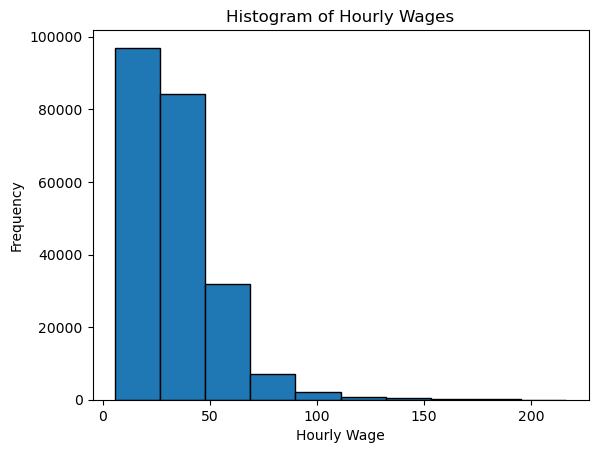

In [48]:
import matplotlib.pyplot as plt

plt.hist(data2['HRLYEARN'], bins=10, edgecolor='black')
plt.xlabel('Hourly Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Hourly Wages')
plt.show()

In [27]:
data2.describe()

,PROV,CMA,AGE_12,SEX,MARSTAT,EDUC,MJH,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,PAIDOT,UNPAIDOT,XTRAHRS,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,SCHOOLN,EFAMTYPE
count,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,206264.000000,206264.000000,206264.000000,206264.000000,223792.000000,223792.000000,223792.000000,223792.000000,223792.000000,213334.000000,223792.000000
mean,34.557862,1.780296,5.971103,1.504031,2.904925,3.836290,1.054090,1.718672,2.689555,13.386167,5.110942,22.443416,352.961272,324.483735,1.174921,360.219105,331.016775,14.310398,7.720979,6.536584,14.257563,34.336227,2.359682,1.230393,2.220821,3.011176,1.117211,5.058760
std,14.472853,2.801541,2.800990,0.499985,2.212543,1.453516,0.226197,0.449648,0.614722,4.917282,2.615527,12.566916,106.805351,151.450875,0.379901,111.874585,155.582555,46.677460,34.819115,28.905280,44.704272,18.498759,0.922253,0.704776,1.047460,1.157277,0.383993,5.099748
min,10.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.770000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,0.000000,4.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,10.000000,3.000000,10.000000,350.000000,250.000000,1.000000,350.000000,260.000000,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,35.000000,0.000000,6.000000,2.000000,2.000000,4.000000,1.000000,2.000000,3.000000,14.000000,5.000000,23.000000,380.000000,375.000000,1.000000,400.000000,375.000000,0.000000,0.000000,0.000000,0.000000,29.330000,3.000000,1.000000,2.000000,4.000000,1.000000,3.000000
75%,47.000000,4.000000,8.000000,2.000000,6.000000,5.000000,1.000000,2.000000,3.000000,17.000000,7.000000,34.000000,400.000000,400.000000,1.000000,400.000000,400.000000,0.000000,0.000000,0.000000,0.000000,43.000000,3.000000,1.000000,3.000000,4.000000,1.000000,5.000000
max,59.000000,9.000000,12.000000,2.000000,6.000000,6.000000,2.000000,2.000000,3.000000,21.000000,10.000000,43.000000,990.000000,990.000000,2.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,216.350000,3.000000,4.000000,4.000000,4.000000,3.000000,18.000000


In [203]:
data2[['UHRSMAIN','AHRSMAIN','UTOTHRS','ATOTHRS','HRSAWAY','PAIDOT','UNPAIDOT']].head()

,UHRSMAIN,AHRSMAIN,UTOTHRS,ATOTHRS,HRSAWAY,PAIDOT,UNPAIDOT
2,250.0,220.0,250.0,220.0,0.0,0.0,0.0
3,400.0,400.0,400.0,400.0,0.0,0.0,0.0
4,450.0,420.0,450.0,420.0,0.0,0.0,0.0
6,375.0,375.0,375.0,375.0,0.0,0.0,0.0
7,400.0,840.0,400.0,840.0,0.0,440.0,0.0


In [49]:
data2['MARSTAT'].value_counts(normalize=True)*100
#going to create a binary value that shows that one is married or not. 

1    47.031619
6    29.751734
2    15.478212
5     4.143580
4     2.491599
3     1.103257
Name: MARSTAT, dtype: float64

In [55]:
data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
#Married is 1 and not married is 0

In [56]:
data2['SEX']=data2['SEX'].map({1:0,2:1})
#Male is 0 and Female is 1. 

In [57]:
data2['CMA']=data2['CMA'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})

In [58]:
profile = ProfileReport(data2, title="Profiling Report")
profile.to_file("EDA after dropping null attributes.html")
# Generating the profiling report after removing the null attributes

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
kf=Kfold(n_splits=5,shuffle=True,random_state=42)
cross_val_score(knn,X_train,y_train,cv=kf,scoring='accuracy')

In [2]:
encoder=OneHotEncoder(sparse=False)
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),[])
        ,('cat',encoder,[])
        ]
    )

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 2 (1833078948.py, line 4)

In [ ]:
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

In [ ]:
param_grid={
"penalty": ["l1", "l2"],
"tol": np.linspace(0.0001, 1.0, 50),
"C": np.linspace(0.1, 1.0, 50),
"class_weight": ["balanced", {0:0.8, 1:0.2}]}

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor)
    ,( 'classifier',KNeighborsClassifier(n_neighbors=5))])